In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from dataset import dataloader
from model import CNNPINN

if torch.cuda.is_available():
    device = "cuda"

Feature batch shape: torch.Size([32, 2, 290])
Labels batch shape: torch.Size([32])


Text(0.5, 1.0, 'E = 473634687.51987')

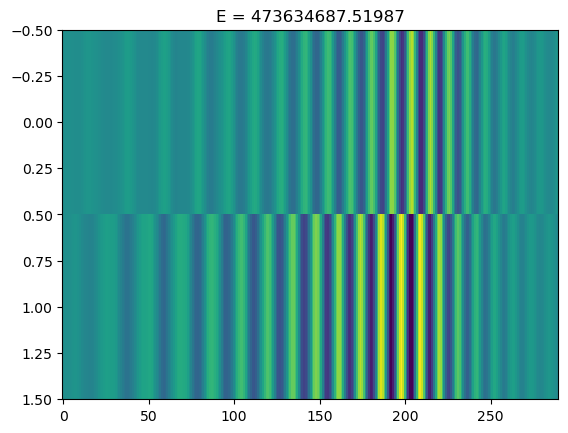

In [2]:
# Display image and label.
train_features, train_labels = next(iter(dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.cpu(), interpolation='None')
plt.axis('auto')
plt.title("E = %.5f" % label)


In [3]:
batch_size = train_features.size()[0]
model = CNNPINN()
model.compile(
    optimizer=torch.optim.Adam(model.parameters(), lr=1e-3), dataloader=dataloader
)
model.train()

100%|██████████| 100/100 [03:09<00:00,  1.90s/it]


Feature batch shape: torch.Size([32, 2, 290])
Labels batch shape: torch.Size([32])


Text(0.5, 1.0, 'E (label) = 151543367.34694\nE (pred) = 230001408.00000')

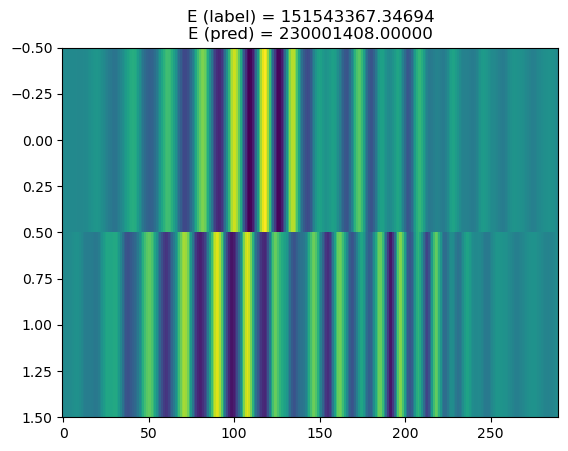

In [9]:
# Display image and label.
train_features, train_labels = next(iter(dataloader))
idx = np.random.randint(0, len(train_features))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[idx].squeeze()
label = train_labels[idx]
plt.imshow(img.cpu(), interpolation='None')
plt.axis('auto')
plt.title("E (label) = %.5f\nE (pred) = %.5f" % (label, model(train_features[idx].unsqueeze(0))))
